## Report Task 

### 1.
How many DNA molecules are there in a solution of $20 \ \mu L$ with concentration of $4 \ \mu M$?
Answer:
$$\begin{aligned}
M &= \frac{n}{V} \rightarrow n = M \cdot V \\
n &= 4 \cdot 10^{-6} M \ \times 20 \cdot 10^{-6} L \\
n &= 8 \cdot 10^{-11} mol
\end{aligned}$$
Where $M, n, and V$ are molar concentration, moles of solute, and liters of solution, respectively. Calculating the number of molecules:
$$\begin{aligned}
molecules &= n \times N_A \\
&= 8 \cdot 10^{-11} mol \ \times 6.02 \cdot 10^23 mol^{-1} \\
&= 48.16 \cdot 10^{12} molecules
\end{aligned}$$
Where $N_A$ is the Avogadro Constant valued $6.02 \cdot 10^{23} \ mol^{-1}$

### 2.
Measure experimental value of melting temperature $T_M$ for each concentration.

In [38]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
# Transforming from xlsx file to DataFrame
col_names = ['Temperature', '4_1', '4_2', '4_3', '2_1', '2_2', '2_3', '1_1', '1_2', '1_3', '0.5_1', '0.5_2', '0.5_3']
result = pd.read_excel('Results.xlsx', index_col=None, usecols='B:N', names=col_names)
print(result.shape) # 101 measurements
print(result.head())

(101, 13)
   Temperature           4_1           4_2          4_3           2_1  \
0         25.0  57052.647666  20246.013234  8471.248676  23928.234478   
1         25.5  57022.599472  20248.539855  8462.474028  23916.112612   
2         26.0  56994.224442  20251.522061  8454.827961  23907.153957   
3         26.5  56968.251461  20255.811698  8447.301124  23898.555109   
4         27.0  56945.620676  20261.973266  8440.109601  23891.726552   

            2_2           2_3           1_1           1_2          1_3  \
0  19830.372377  15947.619549  16200.854292  14601.501306  8477.982780   
1  19823.492566  15933.840319  16196.376771  14594.361639  8472.404033   
2  19815.653224  15921.834302  16191.081116  14588.755839  8468.603176   
3  19808.238064  15909.957715  16185.848384  14582.700376  8465.133840   
4  19801.085249  15899.351923  16179.912970  14577.431752  8462.903200   

          0.5_1        0.5_2        0.5_3  
0  10006.393584  8888.548831  9071.935565  
1  10006.008734  8

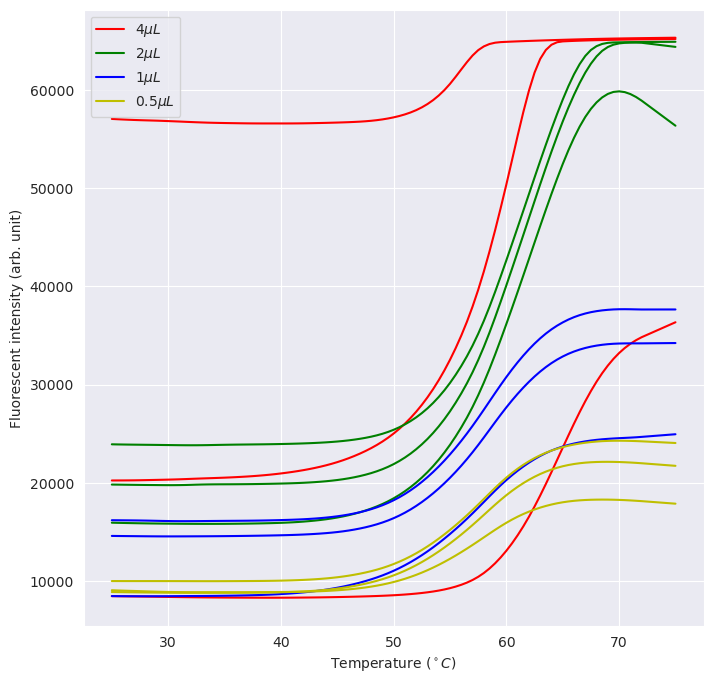

In [40]:
# Plotting the curve of relationship between temperature and fluorescent intensity
sns.set
sns.set_style('darkgrid')
sns.set_palette('husl')

# Initializing figure and axis objects
fig, ax = plt.subplots(figsize=(8,8))

# for concentration = 4
ax.plot(result['Temperature'], result['4_1'], c='r', label=r'$4 \mu L$')
ax.plot(result['Temperature'], result['4_2'], c='r')
ax.plot(result['Temperature'], result['4_3'], c='r')

# for concentration = 2
ax.plot(result['Temperature'], result['2_1'], c='g', label=r'$2 \mu L$')
ax.plot(result['Temperature'], result['2_2'], c='g')
ax.plot(result['Temperature'], result['2_3'], c='g')

# for concentration = 1
ax.plot(result['Temperature'], result['1_1'], c='b', label=r'$1 \mu L$')
ax.plot(result['Temperature'], result['1_2'], c='b')
ax.plot(result['Temperature'], result['1_3'], c='b')

# for concentration = 0.5
ax.plot(result['Temperature'], result['0.5_1'], c='y', label=r'$0.5 \mu L$')
ax.plot(result['Temperature'], result['0.5_2'], c='y')
ax.plot(result['Temperature'], result['0.5_3'], c='y')

# Setting the labels
ax.set_xlabel(r'Temperature ($^\circ C$)')
ax.set_ylabel('Fluorescent intensity (arb. unit)')

# Show the plot
plt.legend()
fig.savefig('../results/assign2_0.png')
plt.show()

In [41]:
# Deriving the curve
result_derivative = pd.DataFrame(columns=col_names) # Initiating an empty dataframe

# Start looping for each column (temperature and its copies)
for col_name in col_names[1:]:
    delta_y = np.diff(result[col_name]) / np.diff(result['Temperature']) # The differences of each measurement / temperature difference
    result_derivative[col_name] = delta_y

# The temperature value of the derivative is calculated by taking the mean between two measurements
result_derivative['Temperature'] = np.array([(result.iloc[i, 0] + result.iloc[i + 1, 0]) / 2 for i in range(result.shape[0] - 1)])

print(result_derivative.shape)
print(result_derivative.head())

(100, 13)
   Temperature        4_1        4_2        4_3        2_1        2_2  \
0        25.25 -60.096387   5.053242 -17.549296 -24.243733 -13.759623   
1        25.75 -56.750060   5.964413 -15.292134 -17.917309 -15.678683   
2        26.25 -51.945963   8.579273 -15.053674 -17.197697 -14.830321   
3        26.75 -45.261570  12.323137 -14.383045 -13.657113 -14.305629   
4        27.25 -39.416177  17.904509 -14.890282 -13.431396 -12.534972   

         2_3        1_1        1_2        1_3     0.5_1      0.5_2      0.5_3  
0 -27.558461  -8.955042 -14.279335 -11.157494 -0.769699 -17.800981 -45.501277  
1 -24.012032 -10.591311 -11.211600  -7.601714 -2.392019 -15.082983 -34.250356  
2 -23.753174 -10.465463 -12.110927  -6.938672 -1.224519 -15.329521 -36.962518  
3 -21.211584 -11.870828 -10.537248  -4.461279 -0.825992 -14.142426 -33.368124  
4 -20.884264 -15.337335 -12.091727  -4.421662 -0.036388 -13.209475 -36.548562  


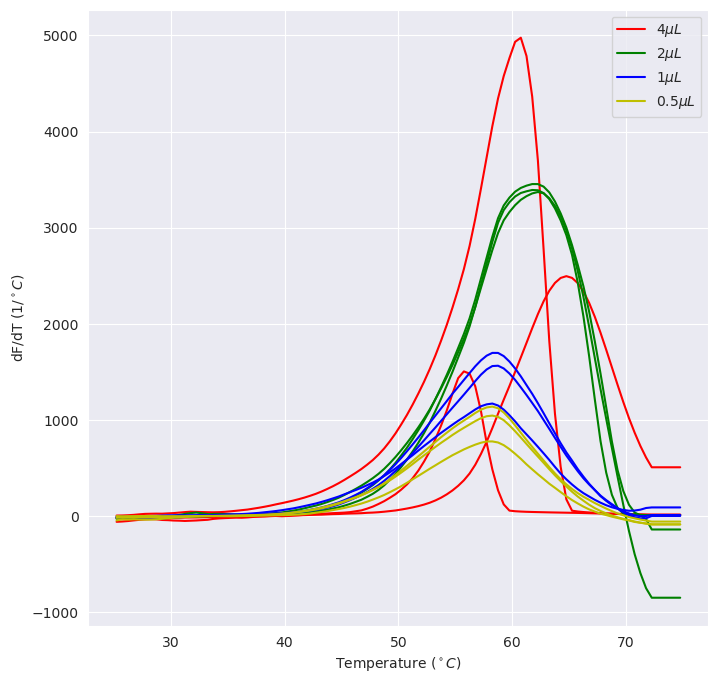

In [42]:
# Plotting the derivative curve
# Initializing
fig, ax = plt.subplots(figsize=(8,8))

# for concentration = 4
ax.plot(result_derivative['Temperature'], result_derivative['4_1'], c='r', label=r'$4 \mu L$')
ax.plot(result_derivative['Temperature'], result_derivative['4_2'], c='r')
ax.plot(result_derivative['Temperature'], result_derivative['4_3'], c='r')

# for concentration = 2
ax.plot(result_derivative['Temperature'], result_derivative['2_1'], c='g', label=r'$2 \mu L$')
ax.plot(result_derivative['Temperature'], result_derivative['2_2'], c='g')
ax.plot(result_derivative['Temperature'], result_derivative['2_3'], c='g')

# for concentration = 1
ax.plot(result_derivative['Temperature'], result_derivative['1_1'], c='b', label=r'$1 \mu L$')
ax.plot(result_derivative['Temperature'], result_derivative['1_2'], c='b')
ax.plot(result_derivative['Temperature'], result_derivative['1_3'], c='b')

# for concentration = 0.5
ax.plot(result_derivative['Temperature'], result_derivative['0.5_1'], c='y', label=r'$0.5 \mu L$')
ax.plot(result_derivative['Temperature'], result_derivative['0.5_2'], c='y')
ax.plot(result_derivative['Temperature'], result_derivative['0.5_3'], c='y')

# Setting the labels
ax.set_xlabel(r'Temperature ($^\circ C$)')
ax.set_ylabel(r'dF/dT ($1 / ^\circ C$)')

# Show the plots
plt.legend()
fig.savefig('../results/assign2_1.png')
plt.show()

In [43]:
# Finding the melting temperature
idx = result_derivative.iloc[:, 1:].idxmax(axis=0) # Find the indices of maximum value for each concentration (and its copies)
T_M = result_derivative.iloc[idx, 0] # Obtain the temperature from the previous indices
concentration = np.array([4, 2, 1, 0.5]) # Initialize the concentration array 
T_M_final = [T_M[3*i:3*(i+1)].mean() for i in range(len(concentration))] # Calculating the mean for each concentration
T_M_exp = pd.DataFrame({str(key): [np.around(value + 273.15, 2)] for key, value in zip(concentration, T_M_final)}, index=['T_M_exp (K)']) # Create the dataframe 
print(T_M_exp)


                4.0     2.0     1.0    0.5
T_M_exp (K)  333.57  335.07  331.57  331.4


/tmp/ipykernel_9478/3439869560.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  T_M_final = [T_M[3*i:3*(i+1)].mean() for i in range(len(concentration))] # Calculating the mean for each concentration


### 4.
By nearest neighbor method, compute theoretical values of $\Delta H^{\circ}$ and $\Delta S^{\circ}$ of the DNA sequence used in the experiment.


In [44]:
# Calculating the enthalpy and entropy change
delta_H = 0.6 - (9.4 + 8.8 + 8.2 + 6.6 + 9.4 + 8.0 + 8.8 + 10.9 + 8.2 + 6.6)
delta_S = -9.0 - (25.5 + 23.5 + 21.0 + 16.4 + 25.5 + 21.9 + 23.5 + 28.4 + 21.0 + 16.4)
print(f'delta_H: {delta_H}')
print(f'delta_S: {delta_S}')


delta_H: -84.30000000000001
delta_S: -232.10000000000002


### 5.
Compute theoretical value of melting temperature $T_M$ for each concentration used in the experiment

In [45]:
# Defining function to calculate theoretical T_M value
def T_M_theoretical(C, delta_H, delta_S, R):
    numerator = delta_H * 1e3
    denominator = (delta_S + R * np.log(C / 2))
    return numerator / denominator

R = 1.987 # Gas constant (https://www.chemeurope.com/en/encyclopedia/Gas_constant.html)
T_M_theo = np.array([T_M_theoretical(C, delta_H, delta_S, R) for C in (concentration * 1e-6)]) # Calculating theoretial T_M for each concentration
T_M_theo = pd.DataFrame({str(key): [np.around(value, 2)] for key, value in zip(concentration, T_M_theo)}, index=['T_M_theo (K)']) # Create the dataframe
print(T_M_theo)

                 4.0     2.0     1.0     0.5
T_M_theo (K)  326.52  324.79  323.08  321.38


In [46]:
# Make dataframe that consists of both method results
T_M_compare = pd.concat([T_M_theo.iloc[:, :], T_M_exp], ignore_index=False)
diff = (np.abs(T_M_compare.iloc[1, :] - T_M_compare.iloc[0, :]) * 100 / T_M_compare.iloc[0, :])
diff = pd.DataFrame({str(key): [np.around(value, 3)] for key, value in zip(concentration, diff)}, index=['% Diff'])
T_M_compare = pd.concat([T_M_compare, diff])
print(T_M_compare)

                  4.0      2.0      1.0      0.5
T_M_theo (K)  326.520  324.790  323.080  321.380
T_M_exp (K)   333.570  335.070  331.570  331.400
% Diff          2.159    3.165    2.628    3.118


### 6.
(Optional) Measure experimental values of $\Delta H^{\circ}$ and $\Delta S^{\circ}$ using Van 't Hoff plot

In [47]:
# Calculating data for x and y axes
x = np.log(concentration * 1e-6 / 2) # ln C / 2
y = (1 / (T_M_exp.iloc[0, :])).values # 1 / T_M
print(f'x: {np.around(x, 5)}')
print(f'y: {np.around(y, 5)}')

x: [-13.12236 -13.81551 -14.50866 -15.2018 ]
y: [0.003   0.00298 0.00302 0.00302]


In [48]:
# Determining the fit line
from regression import LinearRegression # Import regression class from a self-made module

model = LinearRegression(x, y)
model.delta()
slope = model.a_best()
intercept = model.b_best()
print(f'slope: {slope:.10f}')
print(f'intercept: {intercept:.10f}')


slope: -0.0000130410
intercept: 0.0028192568


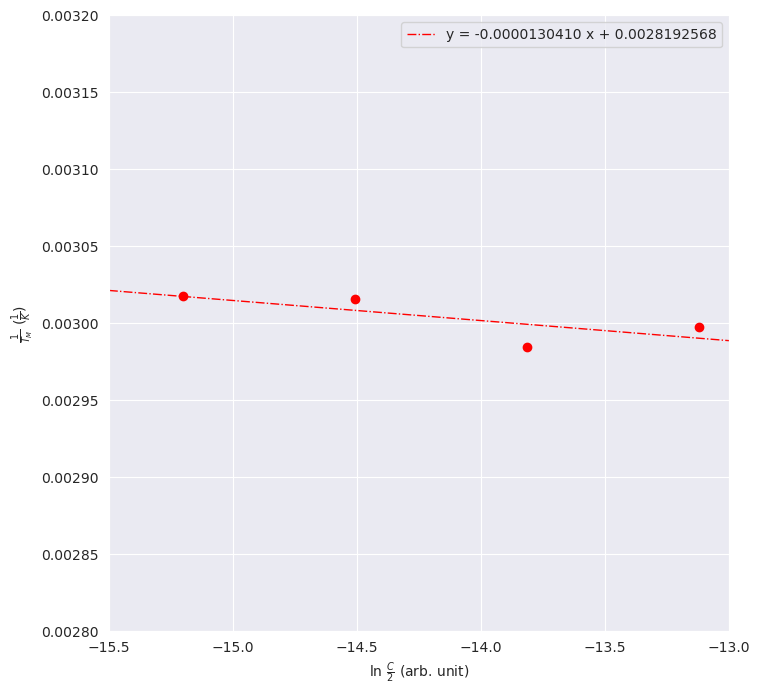

In [49]:
# Plotting the Van't Hoff graph

# x and y limit (determined by trial and error)
x_0 = -15.5
x_t = -13
y_0 = 0.0028
y_t = 0.0032
x_int = np.linspace(x_0, x_t, 10)

# Start plotting
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x, y, c='r') # I use scatter plot for the data
ax.plot(x_int, slope * x_int + intercept, c='r', linestyle='-.', linewidth=1, label=f'y = {slope:.10f} x + {intercept:.10f}') # I use lineplot for the fit line

# Setting the labels and limits
ax.set_xlabel(r'ln $\frac{C}{2}$ (arb. unit)')
ax.set_ylabel(r'$\frac{1}{T_M} \ (\frac{1}{K})$')
ax.set_xlim(x_0, x_t)
ax.set_ylim(y_0, y_t)

# Show the plot
plt.legend()
fig.savefig('../results/assign6_0')
plt.show()

In [50]:
# Obtaining deltaH and deltaS experimentally
delta_H_exp = (R / slope) / 1000 # Delta H
print(f'delta_H_exp: {delta_H_exp:.1f}')

delta_S_exp = delta_H_exp * intercept * 1000 # Delta S
print(f'delta_S_exp: {delta_S_exp:.1f}')

delta_H_exp: -152.4
delta_S_exp: -429.6


### Processing Without C = 4.0

In [51]:
# As mentioned in the lecture, the result of concentration C = 4.0 is bad, thus it is not used.
x_1 = x[1:]
y_1 = y[1:]

model_1 = LinearRegression(x_1, y_1)
model_1.delta()
slope_1 = model_1.a_best()
intercept_1 = model_1.b_best()
print(f'slope_1: {slope_1:.10f}')
print(f'intercept_1: {intercept_1:.10f}')

slope_1: -0.0000238409
intercept_1: 0.0026600696


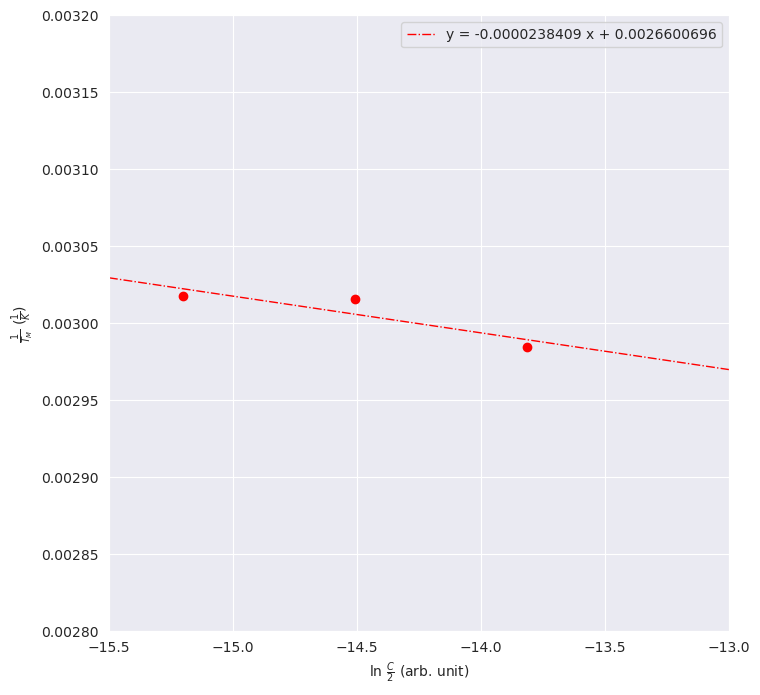

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x_1, y_1, c='r')
ax.plot(x_int, slope_1 * x_int + intercept_1, c='r', linestyle='-.', linewidth=1, label=f'y = {slope_1:.10f} x + {intercept_1:.10f}')

ax.set_xlabel(r'ln $\frac{C}{2}$ (arb. unit)')
ax.set_ylabel(r'$\frac{1}{T_M} \ (\frac{1}{K})$')
ax.set_xlim(x_0, x_t)
ax.set_ylim(y_0, y_t)
plt.legend()
fig.savefig('../results/assign6_1.png')
plt.show()

In [53]:
delta_H_exp_1 = (R / slope_1) / 1000
print(f'delta_H_exp_1: {delta_H_exp_1:.1f}')

delta_S_exp_1 = delta_H_exp_1 * intercept_1 * 1000
print(f'delta_S_exp_1: {delta_S_exp_1:.1f}')

delta_H_exp_1: -83.3
delta_S_exp_1: -221.7


#### Conclussion

Theoretical: 
$$
\Delta H^{\circ}: -84.30000000000001 \\
\Delta S^{\circ}: -232.10000000000002 \\
$$

Experimental (With C = 4.0): 
$$
\Delta H^{\circ}: -152.37862822238395 \\
\Delta S^{\circ}: -429.806677406059 \\
$$

Experimental (Without C = 4.0) 
$$
\Delta H^{\circ}: -83.34403845458952 \\
\Delta S^{\circ}: -221.81557587659879 \\
$$

Data $C = 4.0$ does change the slope and hence the result.